In [50]:
import pandas as pd
import matplotlib as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [51]:
df = pd.read_csv('Gun Violence.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']
df = df[df['year'] > 2013]
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,loss
278,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1,1,2,0
279,92401,2014-01-01,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1,1,2,0
280,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,1,2,1
281,92142,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1,1,2,1
282,95261,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1,1,2,1


# Quick Initial EDA

In [52]:
df.dtypes

incident_id                             int64
date                           datetime64[ns]
state                                  object
city_or_county                         object
address                                object
n_killed                                int64
n_injured                               int64
incident_url                           object
source_url                             object
incident_url_fields_missing              bool
congressional_district                float64
gun_stolen                             object
gun_type                               object
incident_characteristics               object
latitude                              float64
location_description                   object
longitude                             float64
n_guns_involved                       float64
notes                                  object
participant_age                        object
participant_age_group                  object
participant_gender                

In [53]:
df['state'].value_counts()

Illinois                17538
California              16267
Florida                 15016
Texas                   13566
Ohio                    10234
New York                 9696
Georgia                  8919
Pennsylvania             8909
North Carolina           8727
Louisiana                8094
Tennessee                7616
South Carolina           6934
Missouri                 6621
Michigan                 6122
Massachusetts            5981
Virginia                 5943
Indiana                  5845
Maryland                 5793
Alabama                  5469
New Jersey               5373
Wisconsin                4786
Kentucky                 4154
Mississippi              3597
Oklahoma                 3449
Washington               3430
Colorado                 3198
District of Columbia     3189
Connecticut              3064
Arkansas                 2842
Iowa                     2517
Minnesota                2406
Arizona                  2323
Oregon                   2286
Kansas    

In [54]:
df['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              93516
0::Handgun                                                                                                                                                                                                                                                                                                                                                                                

In [55]:
df['n_guns_involved'].value_counts().head(10)

1.0     127464
2.0       7465
3.0       2018
4.0        870
5.0        435
6.0        285
7.0        232
8.0        137
9.0        111
10.0       103
Name: n_guns_involved, dtype: int64

In [56]:
df['state_house_district'].value_counts().head(10)

18.0    3472
10.0    3408
32.0    3216
31.0    3188
3.0     3059
2.0     2939
34.0    2892
6.0     2865
13.0    2756
29.0    2678
Name: state_house_district, dtype: int64

In [57]:
agg_d = {'n_killed':'sum',
         'n_injured':'sum'}
date_df = df.groupby('date').agg(agg_d)
date_df = date_df.reset_index()
date_df.head()

,date,n_killed,n_injured
0,2014-01-01,50,132
1,2014-01-02,29,48
2,2014-01-03,37,59
3,2014-01-04,37,73
4,2014-01-05,31,66


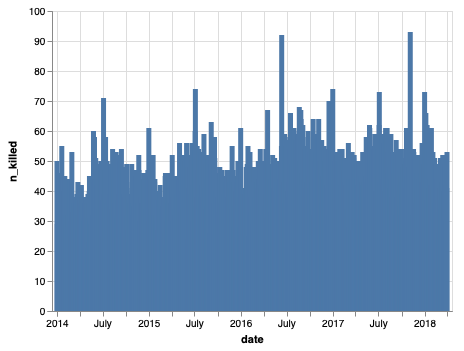

In [58]:
alt.Chart(date_df).mark_bar().encode(
    x='date',
    y='n_killed'
)

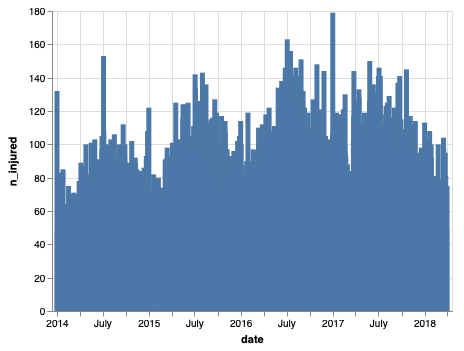

In [59]:
alt.Chart(date_df).mark_bar().encode(
    x='date',
    y='n_injured'
)

# Aggregation

In [49]:
agg_d2 = {'loss':'sum',
          #'loss':'mean',
          'state':'count'}
state_agg_df = df.groupby('state').agg(agg_d2)
state_agg_df['total incidents'] = state_agg_df['state']
state_agg_df = state_agg_df.drop(columns = 'state')
state_agg_df['loss per incident'] = state_agg_df['loss']/state_agg_df['total incidents']
state_agg_df.head()

,loss,total incidents,loss per incident
state,,,
Alabama,4866,5469,0.889742
Alaska,592,1349,0.438844
Arizona,2166,2323,0.932415
Arkansas,2120,2842,0.745954
California,13021,16267,0.800455


In [48]:
population_df = pd.read_csv('State Populations.csv')
population_df
merge_df = state_agg_df.merge(population_df,left_on ='state',right_on ='State')
merge_df = merge_df.set_index('State')
merge_df['incidents per capita'] = (merge_df['total incidents']/merge_df['2018 Population']) * 100000
merge_df.sort_values('incidents per capita', ascending = False).head(10)

,loss,total incidents,loss per incident,2018 Population,incidents per capita
State,,,,,
District of Columbia,1830,3189,0.573848,703608,453.235324
Alaska,592,1349,0.438844,738068,182.774487
Delaware,1057,1682,0.628419,971180,173.191375
Louisiana,6517,8094,0.805164,4682509,172.856048
Illinois,16831,17538,0.959688,12768320,137.355580
South Carolina,4671,6934,0.673637,5088916,136.256916
Mississippi,3051,3597,0.848207,2982785,120.591997
Tennessee,6259,7616,0.821822,6782564,112.287919
Alabama,4866,5469,0.889742,4888949,111.864534


# Mass Shootings

In [62]:
mass_df = df[df['loss'] > 5]
mass_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,loss
1803,95500,2014-01-12,Louisiana,Tallulah,3600 block of Highway 80 W,0,6,http://www.gunviolencearchive.org/incident/95500,http://www.myarklamiss.com/crime/update-3-new-...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.ksla.com/story/24428661/6-hurt-in-m...,19.0,34.0,2014,1,12,6,6
2477,97407,2014-01-16,Oklahoma,Ardmore,NaN,2,4,http://www.gunviolencearchive.org/incident/97407,http://www.kxii.com/news/headlines/Police-iden...,False,...,0::Injured||1::Injured||2::Injured||3::Killed|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/teen-who-shot-4-in...,48.0,14.0,2014,1,16,3,6
6288,107447,2014-02-15,Florida,Fort Lauderdale,3033 Northeast 32 Avenue,0,6,http://www.gunviolencearchive.org/incident/107447,http://www.nbcmiami.com/news/local/Correctioon...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.sun-sentinel.com/fl-shooters-gunsho...,93.0,34.0,2014,2,15,5,6
6372,107519,2014-02-16,Texas,Dallas,2600 block of South Harwood Street,1,7,http://www.gunviolencearchive.org/incident/107519,http://www.nbcdfw.com/news/local/One-Dead-Six-...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nbcdfw.com/news/local/One-Dead-Six-...,100.0,23.0,2014,2,16,6,8
6412,107417,2014-02-16,Florida,Orange County,4500 block of Riviera Shores,1,6,http://www.gunviolencearchive.org/incident/107417,http://www.orlandosentinel.com/news/local/brea...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.orlandosentinel.com/news/local/brea...,49.0,13.0,2014,2,16,6,7


In [90]:
laws_df = pd.read_csv('Gun Law Scorecard.csv')
laws_df.head()

,Gun Law Strength,State,Gun Law Grade,Gun Death Rate Rank,Gun Death Rate Per Capita
0,1,California,A,44,7.8
1,2,New Jersey,A,45,5.3
2,3,Connecticut,A-,46,5.1
3,4,Maryland,A-,29,12.3
4,5,Massachusetts,A-,49,3.7


In [64]:
mass_agg_df = mass_df.groupby('state').agg(agg_d2)
mass_agg_df['total incidents'] = mass_agg_df['state']
mass_agg_df = mass_agg_df.drop(columns = 'state')
mass_agg_df['loss per incident'] = mass_agg_df['loss']/mass_agg_df['total incidents']
mass_agg_df.head()

,loss,total incidents,loss per incident
state,,,
Alabama,40,5,8.000000
Alaska,6,1,6.000000
Arizona,28,4,7.000000
Arkansas,52,4,13.000000
California,265,30,8.833333


In [94]:
merge_mass_df = mass_agg_df.merge(population_df,left_on ='state',right_on ='State')
merge_mass_df = merge_mass_df.merge(laws_df, on = 'State')
merge_mass_df = merge_mass_df.set_index('State')
merge_mass_df['incidents per capita'] = (merge_mass_df['total incidents']/merge_mass_df['2018 Population']) * 100000
merge_mass_df.sort_values('incidents per capita', ascending = False).head(10)


,loss,total incidents,loss per incident,2018 Population,Gun Law Strength,Gun Law Grade,Gun Death Rate Rank,Gun Death Rate Per Capita,incidents per capita
State,,,,,,,,,
Louisiana,129,16,8.062500,4682509,30,F,4,21.6,0.341697
Illinois,160,23,6.956522,12768320,8,B+,31,12.1,0.180133
Mississippi,34,5,6.800000,2982785,50,F,5,21.5,0.167629
Tennessee,72,10,7.200000,6782564,27,D-,11,18.4,0.147437
Alaska,6,1,6.000000,738068,44,F,1,24.5,0.135489
Kentucky,47,6,7.833333,4472265,43,F,16,16.2,0.134160
Arkansas,52,4,13.000000,3020327,41,F,7,20.2,0.132436
Florida,345,27,12.777778,21312211,19,C-,28,12.3,0.126688
Ohio,109,14,7.785714,11694664,22,D,22,13.7,0.119713


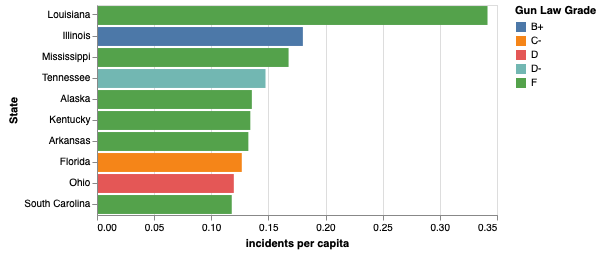

In [98]:
source1 = merge_mass_df.sort_values('incidents per capita', ascending = False).reset_index().head(10)

alt.Chart(source1).mark_bar().encode(
    x='incidents per capita:Q',
    y=alt.Y(
        'State:N',
        sort=alt.EncodingSortField(
            field="incidents per capita",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending"  # The order to sort in
        )
    ),
    color = 'Gun Law Grade'
)

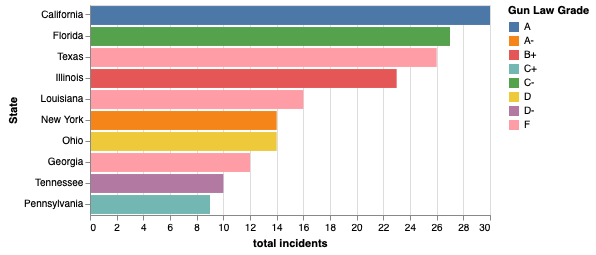

In [99]:
source2 = merge_mass_df.sort_values('total incidents', ascending = False).reset_index().head(10)

alt.Chart(source2).mark_bar().encode(
    x='total incidents:Q',
    y=alt.Y(
        'State:N',
        sort=alt.EncodingSortField(
            field="total incidents",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending"  # The order to sort in
        )
    ),
    color = 'Gun Law Grade'
)

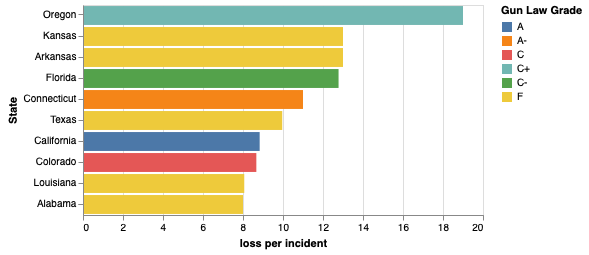

In [100]:
source3 = merge_mass_df.sort_values('loss per incident', ascending = False).reset_index().head(10)

alt.Chart(source3).mark_bar().encode(
    x='loss per incident:Q',
    y=alt.Y(
        'State:N',
        sort=alt.EncodingSortField(
            field="loss per incident",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending"  # The order to sort in
        )
    ),
    color = 'Gun Law Grade'
)

In [103]:
agg_g = {'incidents per capita':'mean',
         'loss':'mean'}
merge_mass_df.groupby('Gun Law Grade').agg(agg_g)

,incidents per capita,loss
Gun Law Grade,,
A,0.070922,150.500000
A-,0.067102,44.000000
B,0.102968,6.000000
B+,0.103346,86.000000
C,0.066424,44.500000
C+,0.049099,37.000000
C-,0.089217,176.500000
D,0.087223,66.333333
D-,0.084573,37.666667
